In [36]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [16]:
df = sns.load_dataset("iris")

In [17]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
X = df.iloc[:,:-1]
y = df["species"]

In [21]:
ss = StandardScaler()
X_scaled = pd.DataFrame(ss.fit_transform(X),columns=X.columns)

In [20]:
X_scaled

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [22]:
linkage_ = linkage(X_scaled,method="ward")

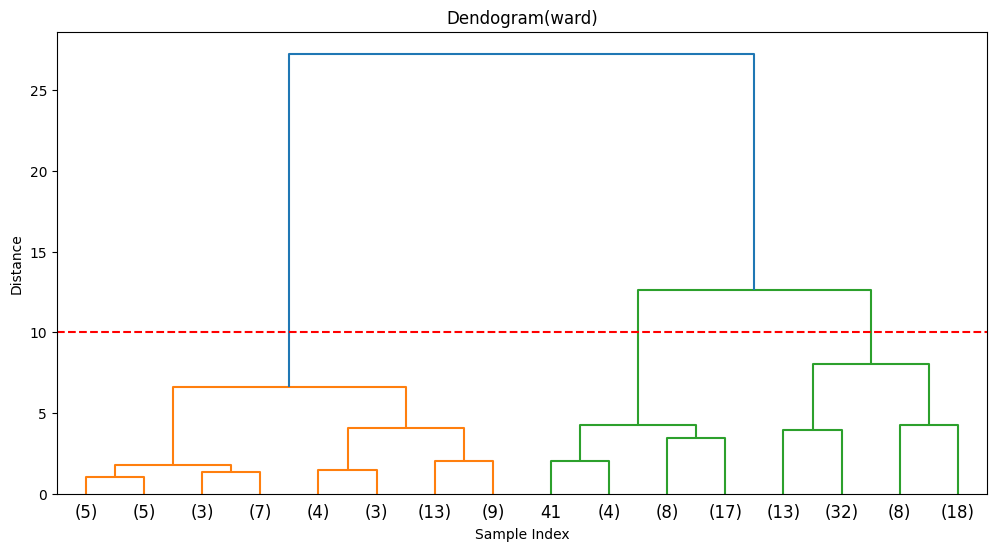

In [29]:
plt.figure(figsize=(12,6))
dendrogram(linkage_,truncate_mode='level',p=3)
plt.axhline(y=10, color='r', linestyle='--')
plt.title("Dendogram(ward)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [32]:
clustering = AgglomerativeClustering(n_clusters=3,linkage="ward")
cluster_pred = clustering.fit_predict(X_scaled)

In [34]:
#silhouette score
sil_score = silhouette_score(X_scaled,cluster_pred)

In [35]:
sil_score

0.446689041028591

In [41]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [44]:
X_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

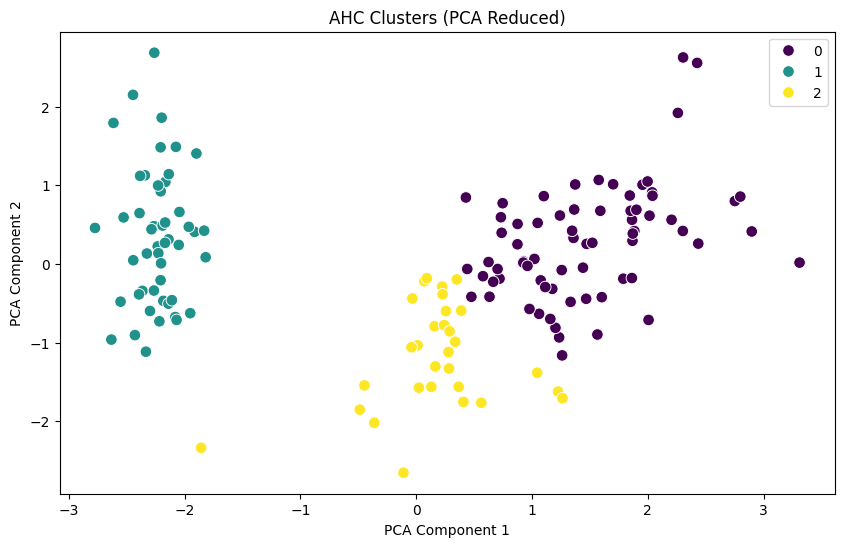

In [55]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1],hue=cluster_pred,palette="viridis",s=70)
plt.title("AHC Clusters (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
# plt.colorbar(label="Cluster")
# plt.scatter(cluster_pred.cluster_centers_[:,0],cluster_pred.cluster_centers_[:,1],c="red",s=200,marker="*",label="centroids")
plt.show()
